Creazione di una rete neurale artificiale per il
riconoscimento dei numeri scritti da persone in
un dataset di immagini.

In questo esempio è stato utilizzato il dataset [MNIST](https://en.wikipedia.org/wiki/MNIST_database)

In [1]:
# importazione librerie necessarie
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# scaricamento del dataset MNIST; la prima volta
# che si esegue potrebbe essere un'operazione
# lenta; fatta una volta il dataset resta nella
# cache del virtual enviroment utilizzato ed i
# successivi richiami sono istantanei
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


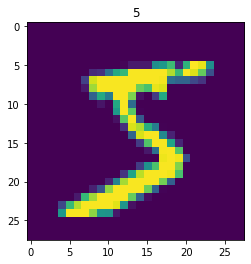

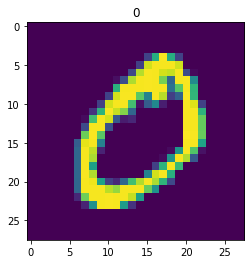

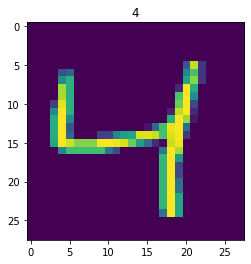

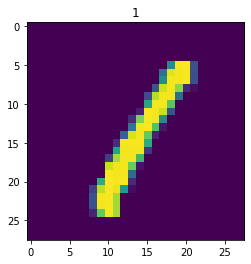

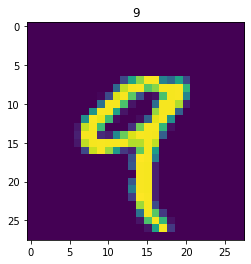

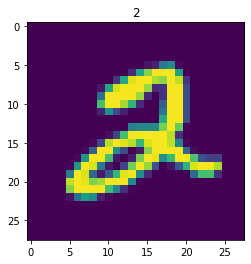

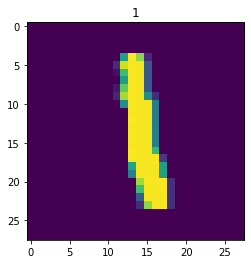

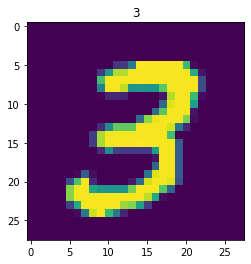

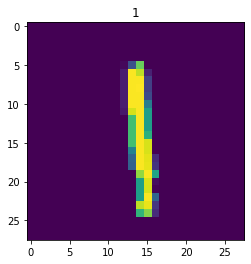

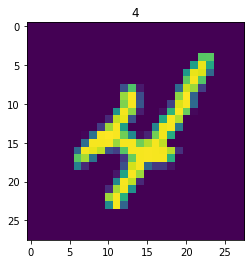

In [3]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.show()

In [4]:
# pre-processing dei dataset

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

# appiattimento di ogni immagine da un array 28x28 ad un array di 784 pixel
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [5]:
# trasformazione delle label tramite hot-encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# esempio di codifica one-hot su un esempio di addestramento:
print(train_labels[42])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [6]:
# creazione del modello

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# compilazione del modello

model.compile(
  optimizer=Adam(learning_rate=0.005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [9]:
# riepilogo del modello compilato

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# addestramento del modello
# nell'oggetto history avremo il resoconto
# dell'addestramento epoca per epoca

history = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=10,
    batch_size=250,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)

Epoch 1/10
240/240 [==============================] - 2s 4ms/step - loss: 0.2904 - accuracy: 0.9153 - val_loss: 0.1595 - val_accuracy: 0.9533
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 0.1271 - accuracy: 0.9615 - val_loss: 0.1208 - val_accuracy: 0.9627
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0917 - accuracy: 0.9721 - val_loss: 0.1094 - val_accuracy: 0.9667
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9762 - val_loss: 0.1115 - val_accuracy: 0.9664
Epoch 5/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0621 - accuracy: 0.9804 - val_loss: 0.0934 - val_accuracy: 0.9733
Epoch 6/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9825 - val_loss: 0.1153 - val_accuracy: 0.9658
Epoch 7/10
240/240 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9841 - val_loss: 0.0901 - val_accuracy: 0.9736
Epoch 

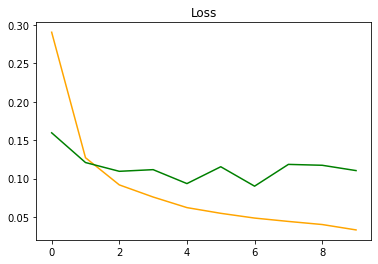

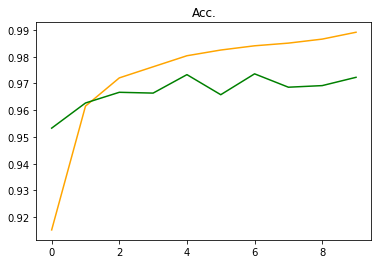

In [11]:
# visualizzazione su grafico
# dell'andamento dell'addestramento

# errore modello
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='green')
plt.title('Loss')
plt.show()

# accuratezza modello
plt.plot(history.history['accuracy'], color='orange')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('Acc.')
plt.show()

In [12]:
# valutazione delle performance del modello

model.evaluate(
  test_images,
  test_labels
)

313/313 [==============================] - 1s 3ms/step - loss: 0.1103 - accuracy: 0.9723


[0.11032614856958389, 0.9722999930381775]

In [14]:
# predizione delle prime 5 immagini di test
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# verifica della correttezza della previsione
print(np.argmax(test_labels[:5], axis=1)) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


### Tuning Hyperparameters
---
Provare a modificare:

- learning rate
- numero di epoche addestrate
- dimensioni dei batch di addestramento
- il numero di layer nascosti
- il numero di neuroni nei layer
- le funzioni di attivazione utilizzate
- provare ad utilizzare un altro dataset ed effettuare predizioni su questo